In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df_students_take_tests = pd.read_csv("../tables_creation/final_tables/students_take_tests.csv")
df_students = pd.read_csv("../tables_creation/final_tables/students.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_13340\3529048147.py:2: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_students = pd.read_csv("../tables_creation/final_tables/students.csv")


In [18]:
df_students_take_tests = df_students_take_tests.loc[df_students_take_tests['test_subject'] == 'ukrtest']

In [20]:
df_merged = df_students_take_tests.merge(df_students, how='left', on='outid')
df_merged

,outid,year_x,score100,score12,score,test_status,test_subject,test_type,KOATUU_2020_x,EDRPOU_test_center,birth,sextypename,classprofilename,classlangname,KOATUU_2020_y,EDRPOU_school,year_y
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,5.110137e+09,20995060.0,2000,Female,Інший,Ukrainian,5110136900,23864660.0,2017
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,1.810700e+09,22061344.0,2004,Male,Foreign philology,Ukrainian,1822380901,22056432.0,2021
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,7.110136e+09,25922746.0,2002,Male,Skilled worker,Ukrainian,7110136700,5538052.0,2021
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,6.310137e+09,24486622.0,1998,Male,NaN,NaN,6310136300,23320374.0,2016
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,4.611200e+09,34387362.0,2001,Male,Mathematics,Ukrainian,4611200000,20773804.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457043,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,1.811000e+09,NaN,2005,Female,NaN,NaN,1824087401,727989.0,2022
2457044,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,1.210138e+09,26508368.0,2002,Male,Economics,Russian,1210136600,26509416.0,2019
2457045,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,4.610138e+09,2545659.0,2003,Female,Skilled worker,Ukrainian,4610136300,33195557.0,2021
2457046,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,7.101000e+08,23253324.0,2004,Female,Junior specialist,Ukrainian,710100000,1566465.0,2021


[Text(0.5, 1.0, 'Results of Ukrainian language test by year and gender')]

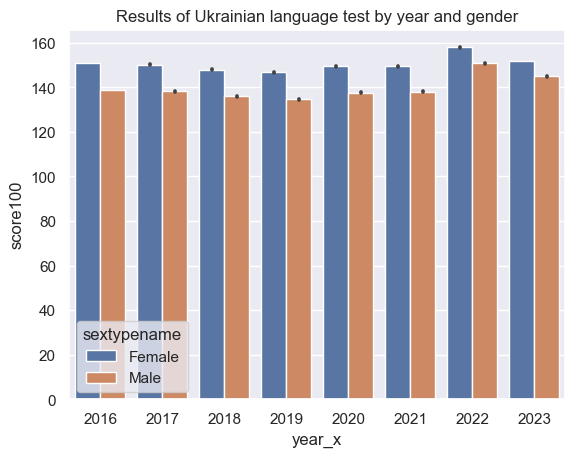

In [25]:
sns.barplot(df_merged.loc[df_merged['test_status'] == 'Accepted'], x="year_x", y="score100", estimator='mean', hue="sextypename").set(title='Results of Ukrainian language test by year and gender')

Note, that relative scores in 200-points scale are used for the plot, and only results of students who reached the threshold are considered. As each year has different system of scaling into 200-points scale, this plot can only be used for comparison of the difference between results by gender during the years.

In [76]:
df_merged_came_to_test = df_merged.loc[df_merged['test_status'].isin(['Accepted', 'Failed'])]
df_failure_rate = df_merged_came_to_test.groupby(["year_x", "test_status", "sextypename"]).test_status.count().unstack().fillna(0)

In [77]:
df_failure_rate['failure_rate_female'] = 0
df_failure_rate['failure_rate_male'] = 0
df_failure_rate

sextypename         Female    Male  failure_rate_female  failure_rate_male
year_x test_status                                                        
2016   Accepted     127617  103017                    0                  0
       Failed         6485   16548                    0                  0
2017   Accepted     117132   95437                    0                  0
       Failed         4615   12522                    0                  0
2018   Accepted     148411  128022                    0                  0
       Failed        13767   32831                    0                  0
2019   Accepted     152882  133531                    0                  0
       Failed        15100   37345                    0                  0
2020   Accepted     135615  116314                    0                  0
       Failed         6518   16007                    0                  0
2021   Accepted     143717  123918                    0                  0
       Failed         6391   14811                    0                  0
2022   Accepted     112290  101784                    0                  0
2023   Accepted     139636  128235                    0                  0
       Failed           87     170                    0                  0

In [95]:
year_list = list(dict.fromkeys([year[0] for year in df_failure_rate.index]))
year_list.remove(2022)

for year in year_list:
    df_failure_rate.loc[year, 'failure_rate_female'] = df_failure_rate.loc[(year, 'Failed'), 'Female'] / (df_failure_rate.loc[(year, 'Accepted'), 'Female'] + df_failure_rate.loc[(year, 'Failed'), 'Female'])
    df_failure_rate.loc[year, 'failure_rate_male'] = df_failure_rate.loc[(year, 'Failed'), 'Male'] / (df_failure_rate.loc[(year, 'Accepted'), 'Male'] + df_failure_rate.loc[(year, 'Failed'), 'Male'])

In [96]:
df_failure_rate

sextypename         Female    Male  failure_rate_female  failure_rate_male
year_x test_status                                                        
2016   Accepted     127617  103017             0.048359           0.138402
       Failed         6485   16548             0.048359           0.138402
2017   Accepted     117132   95437             0.037906           0.115988
       Failed         4615   12522             0.037906           0.115988
2018   Accepted     148411  128022             0.084888           0.204106
       Failed        13767   32831             0.084888           0.204106
2019   Accepted     152882  133531             0.089891           0.218550
       Failed        15100   37345             0.089891           0.218550
2020   Accepted     135615  116314             0.045858           0.120971
       Failed         6518   16007             0.045858           0.120971
2021   Accepted     143717  123918             0.042576           0.106762
       Failed         6391   14811             0.042576           0.106762
2022   Accepted     112290  101784             0.000000           0.000000
2023   Accepted     139636  128235             0.000623           0.001324
       Failed           87     170             0.000623           0.001324

In [99]:
df_failure_rate.reset_index(inplace=True)